In [6]:
import os

# Change the current working directory
os.chdir('C:/Users/Aman/Desktop/Traffic_Sign_Recongnition')



In [7]:
import os

# Change the current working directory
os.chdir('C:/Users/Aman/Desktop/Traffic_Sign_Recongnition')


In [8]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D


# Function to load and preprocess images
def load_images_from_directory(directory_path, image_size=(30, 30)):
    images = os.listdir(directory_path)
    data = []
    labels = []
    class_id = int(os.path.basename(os.path.normpath(directory_path)))

    for image_filename in images:
        try:
            image = Image.open(os.path.join(directory_path, image_filename))
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(class_id)
        except:
            print(f"Error loading image: {os.path.join(path, image_filename)}")

    return data, labels

# Retrieving the images and their labels
data = []
labels = []
num_classes = 43
current_path = os.getcwd()

for class_id in range(num_classes):
    path = os.path.join(current_path, 'data/Train', str(class_id))
    class_data, class_labels = load_images_from_directory(path)
    data.extend(class_data)
    labels.extend(class_labels)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Replace the Flatten layer with GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

# Optionally, you can add more Dense layers with BatchNormalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Make sure num_classes is defined properly for your specific problem
model.add(Dense(num_classes, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_one_hot))
#model.save("model.h5")


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


C:\Users\Aman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.3095 - loss: 2.7925 - val_accuracy: 0.8553 - val_loss: 0.4634
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8770 - loss: 0.4201 - val_accuracy: 0.9504 - val_loss: 0.1570
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9387 - loss: 0.2071 - val_accuracy: 0.9884 - val_loss: 0.0431
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9598 - loss: 0.1315 - val_accuracy: 0.9857 - val_loss: 0.0473
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9702 - loss: 0.0974 - val_accuracy: 0.9948 - val_loss: 0.0189
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9712 - loss: 0.0930 - val_accuracy: 0.9955 - val_loss: 0.0170
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9746 - loss: 0.0851 - val_accuracy: 0.9945 - val_loss: 0.0192
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9780 - loss: 0.0772 - 

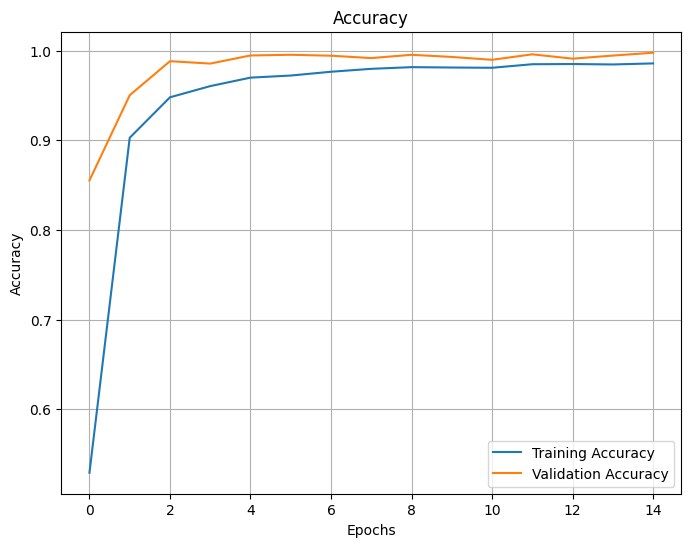

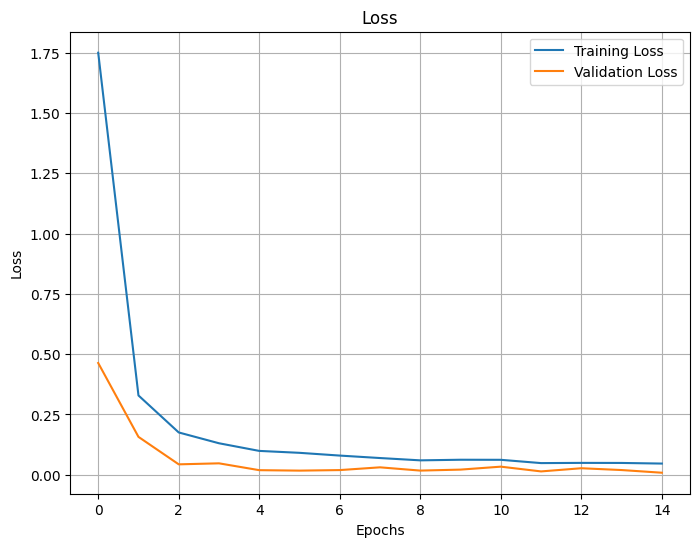

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting graphs for accuracy and loss
plot_accuracy(history)
plot_loss(history)


In [12]:
import os

# Specify the directory path you want to change to
new_directory = 'C:/Users/Aman/Desktop/Traffic_Sign_Recongnition'

# Change the current working directory
os.chdir(new_directory)

# Optionally, verify the directory change
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: C:\Users\Aman\Desktop\Traffic_Sign_Recongnition


In [13]:
cd data

C:\Users\Aman\Desktop\Traffic_Sign_Recongnition\data


C:\Users\Aman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [17]:
import os

# Define the paths
data_path = r'C:\Users\Aman\Desktop\Traffic_Sign_Recongnition\data'
test_path = os.path.join(data_path, 'Test')
train_path = os.path.join(data_path, 'Train')
train_csv_path = os.path.join(data_path, 'Train.csv')

# List contents of the directories
print("Contents of data directory:")
print(os.listdir(data_path))

print("\nContents of Test directory:")
print(os.listdir(test_path))

print("\nContents of Train directory:")
print(os.listdir(train_path))

# Read the contents of Train.csv
with open(train_csv_path, 'r') as file:
    train_csv_contents = file.read()

print("\nContents of Train.csv:")
print(train_csv_contents)


Contents of data directory:
['.DS_Store', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

Contents of Test directory:
['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.p

In [21]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv('C:/Users/Aman/Desktop/Traffic_Sign_Recongnition/data/Train.csv')


labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open("data/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# Make predictions on the test data
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier_model.h5')

1226/1226 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


0.9988523043178862


### Data set link
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign